<h2> Importing Libraries </h2>

In [1]:
import pandas as pd
import re 
import os
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import nltk
import text2emotion as te
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tarushi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tarushi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tarushi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from transformers import *
sentiment = pipeline('sentiment-analysis')

All model checkpoint weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


<h2> Uploading Files</h2>

In [3]:
data1=pd.read_csv("/home/tarushi/Desktop/data_anecdotes/Projects/Farmbill/Data/farmbill2.csv")
data1.drop(["Unnamed: 0"],axis=1,inplace=True)
data1.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN
1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India
2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India"
3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN
4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN


In [4]:
data=pd.read_csv("/home/tarushi/Desktop/data_anecdotes/Projects/Farmbill/Data/farmbill.csv")
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,2020-12-24 23:34:48,1342252416159285249,Check it out :) Albert #Modi #FarmersBill #far...,Twitter for iPhone,1,3,NaN
1,2020-12-24 23:32:04,1342251729472122881,#farmersprotests #farmers #FarmersBill \nFarme...,Twitter Web App,1,4,"43°52'15.0""N 79°31'54.8""W"
2,2020-12-24 23:25:34,1342250092531630081,Farmers are lifeline Thanks for feedin...,Twitter for iPhone,8,18,NaN
3,2020-12-24 23:04:20,1342244749919436801,India's reputation by Wikipedia\nModi needs to...,Twitter for Android,2,3,NaN
4,2020-12-24 22:52:17,1342241716552650752,@JKAURZZ Jdo journalism rishwat de ke keeti h...,Twitter for Android,0,1,NaN


In [5]:
data=data1.append(data)

In [6]:
data.reset_index(inplace=True)
data.head()

,index,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location
0,0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN
1,1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India
2,2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India"
3,3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN
4,4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN


In [7]:
data.drop(['index'],axis=1,inplace=True)

In [8]:
data['Date']=pd.to_datetime(data['Date'])
data['Date'].dtypes

dtype('<M8[ns]')

<h2> Data Cleaning </h2>

In [12]:
data['Tweet'][0]


'#respecteachother #kissanAndolan #KisanVirodhiNarendraModi #FarmersProtest #FarmersBill #FarmersBill #Farmers #FarmersBill2020\n\nWhen you stop listening and just want to proof that only you are right... U r behaving like a communist. \nLET BEHAVE LIKE a democratic nation.\n🙏🙏'

In [15]:
def clean_txt(input_txt, pattern):
    input_txt=re.sub(r'#[\w]*','',input_txt)
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    res=re.sub(r'[^\w\s]', '', input_txt.lower())
    res=re.sub('\s+',' ',res)
    res=re.sub(r'https[\w]*', '', res, flags=re.MULTILINE)
    res=''.join(i for i in res if not i.isdigit())
    res=' '.join([i for i in res.split() if len(i)>2])
    return res
clean_txt(data['Tweet'][0],"@[\w]*")

'when you stop listening and just want proof that only you are right behaving like communist let behave like democratic nation'

In [17]:
data['Clean Tweet']=np.vectorize(clean_txt)(data['Tweet'], "@[\w]*")
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet
0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when you stop listening and just want proof th...
1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,speech farmers protest must watch and share
2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half the problem got sorted when left the rema...
3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN,could have been drafted much bettercoming from...
4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN,the french revolution was turningpoint the ris...


In [18]:
all_tokens=[row['Clean Tweet'].split() for _,row in data.iterrows() ]
from nltk.stem.porter import *
stemmer = PorterStemmer()
for i in range(len(all_tokens)):
    for j in all_tokens[i]:
        j=stemmer.stem(j)
    all_tokens[i]=' '.join(all_tokens[i])
data['Clean Tweet']=all_tokens

In [19]:
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet
0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when you stop listening and just want proof th...
1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,speech farmers protest must watch and share
2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half the problem got sorted when left the rema...
3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN,could have been drafted much bettercoming from...
4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN,the french revolution was turningpoint the ris...


<h2> Data Analysis </h2>

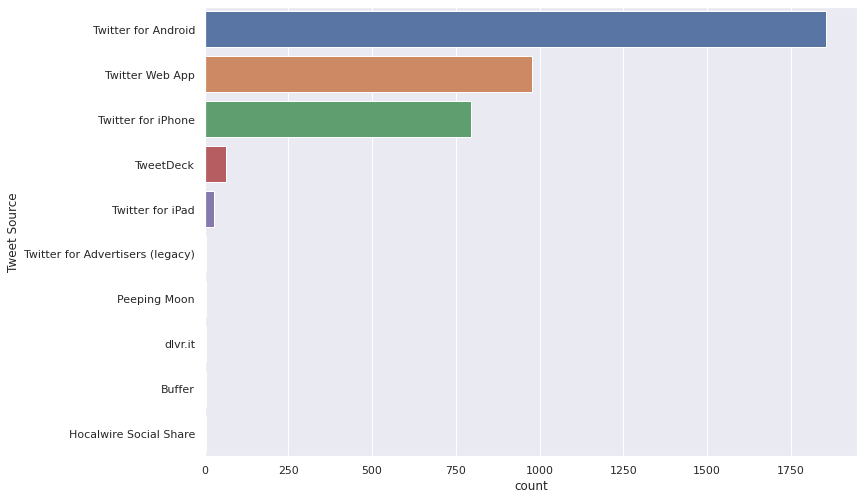

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(y="Tweet Source",  data=data,order=data['Tweet Source'].value_counts().iloc[:10].index)
plt.show()

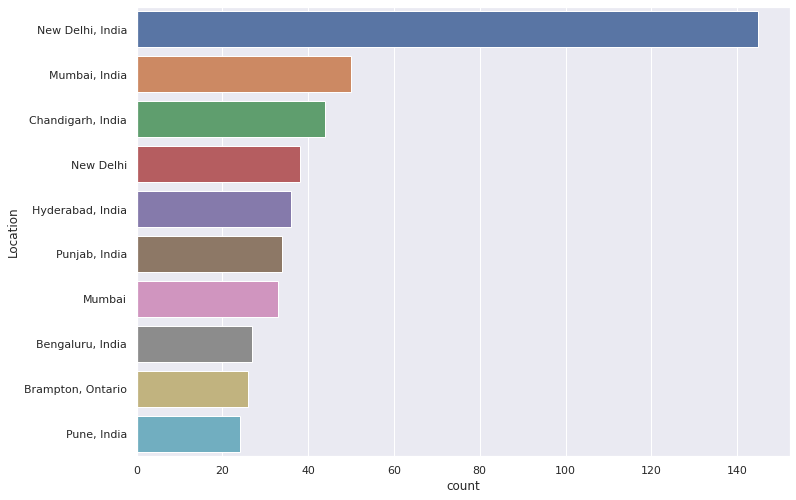

In [21]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(y="Location",  data=data,order=data['Location'].value_counts().iloc[1:11].index)
plt.show()

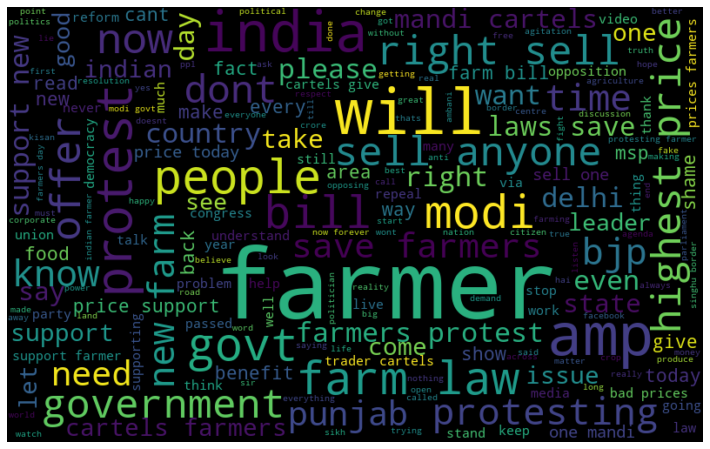

In [26]:
wcloud=' '.join([i for i in data['Clean Tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(wcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("./wcloud.png")
plt.show()

<h2> Getting Sentiment Scores </h2>

In [23]:
def get_scores(text):
    txt=sentiment(text)
    return txt[0]['label']

In [24]:
data['Clean Tweet'][0]

'when you stop listening and just want proof that only you are right behaving like communist let behave like democratic nation'

In [25]:
ss=[get_scores(row['Clean Tweet']) for _,row in data.iterrows()]
data['SS']=ss
data.head()

,Date,User Id,Tweet,Tweet Source,Retweets,Likes,Location,Clean Tweet,SS
0,2021-01-01 23:48:40,1345155008967241729,#respecteachother #kissanAndolan #KisanVirodhi...,Twitter for Android,0,0,NaN,when you stop listening and just want proof th...,NEGATIVE
1,2021-01-01 21:16:19,1345116670075883521,https://t.co/rkCCnptRGT https://t.co/rkCCnptRG...,Twitter for Android,0,0,India,speech farmers protest must watch and share,POSITIVE
2,2021-01-01 20:10:18,1345100056416800768,Half the problem got sorted when @RahulGandhi ...,Twitter Web App,4,8,"New Delhi, India",half the problem got sorted when left the rema...,NEGATIVE
3,2021-01-01 19:49:52,1345094912627200003,@_pallavighosh @RSSxve Could have been drafted...,Twitter for Android,0,0,NaN,could have been drafted much bettercoming from...,NEGATIVE
4,2021-01-01 19:27:42,1345089335935295490,The French Revolution was a turning-point in t...,Twitter for Android,3,14,NaN,the french revolution was turningpoint the ris...,POSITIVE


<h2> Analysis on Basis of the Score</h2>

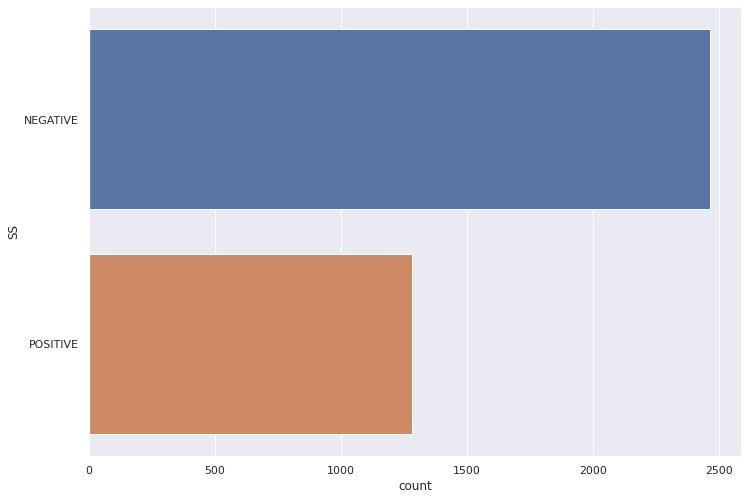

In [27]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(y=data['SS'])
plt.show()

In [28]:
pos=[]
neg=[]
for _,row in data.iterrows():
    if(row['SS']=="POSITIVE"):
        pos.append(row['Clean Tweet'])
    elif(row['SS']=="NEGATIVE"):
        neg.append(row['Clean Tweet'])

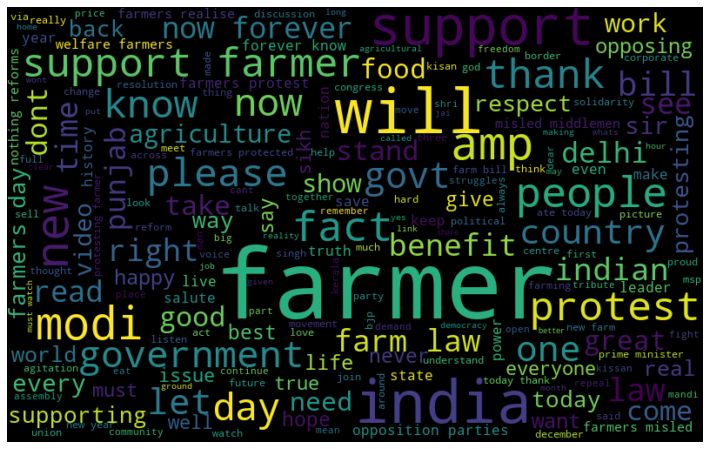

In [29]:
poscloud=' '.join([i for i in pos])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(poscloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("./decpcloud.png")
plt.show()

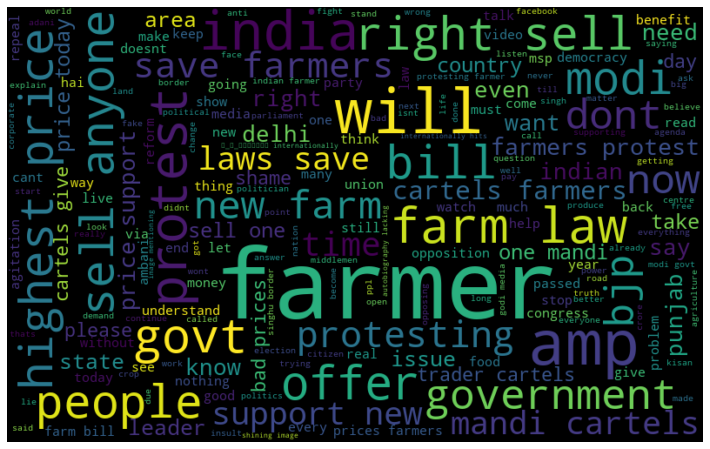

In [30]:
negcloud=' '.join([i for i in neg])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negcloud)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("./decncloud.png")
plt.show()

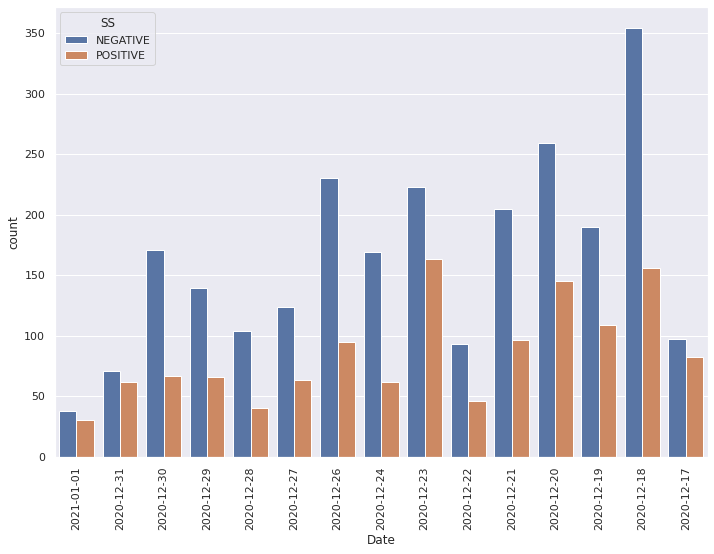

In [31]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.countplot(data['Date'].dt.date,hue=data['SS'])
plt.savefig("./SAdec.png")
plt.xticks(rotation=90)
plt.show()

In [60]:
def hashtag_extract(x):
    hashtags = []
    not_consider=['farmbills','farmersbill','farmersbill2020','farmers','farmerprotest','farmerprotestd','farmersprotests','farmersprotest','indianfarmersrevolution2020']
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        ht=[j for j in ht if j.lower() not in not_consider]
        ht=[j for j in ht if j]
        hashtags.append(ht)

    return hashtags


In [61]:
HT_regular = hashtag_extract(data['Tweet'][data['SS'] == "POSITIVE"])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['Tweet'][data['SS'] == "NEGATIVE"])
pos_h=[]
            # unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

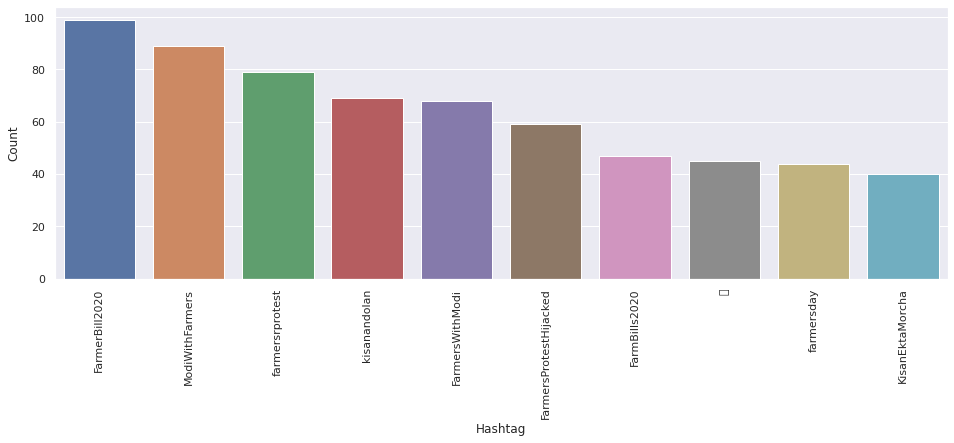

In [64]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.savefig("./phashtags.png")
plt.show()

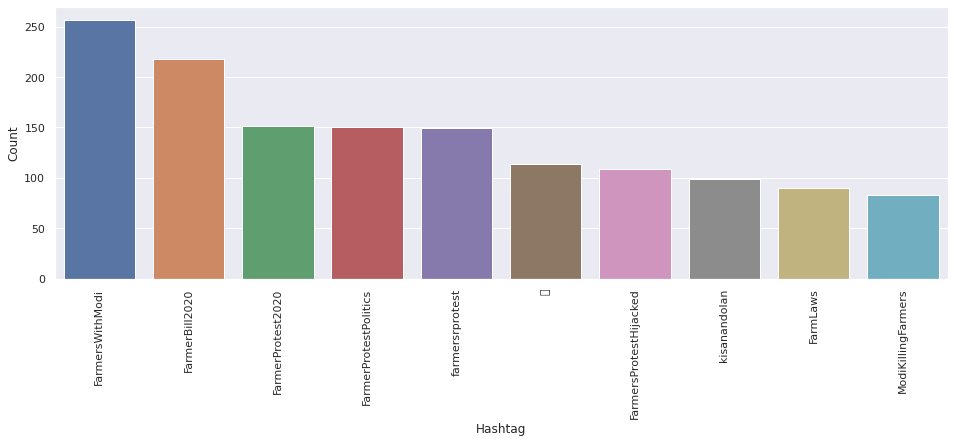

In [66]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.savefig("./nhashtags.png")
plt.show()